In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import image

import matplotlib.pyplot as plt
import seaborn
import os

In [2]:
!unzip /content/drive/MyDrive/PROJECTS/Crop_Disease_Detection/Crop_Disease.zip

Streaming output truncated to the last 5000 lines.
  inflating: PlantDiseasesDataset/Tomato/train/Tomato Yellow Leaf Curl Virus/TomatoYellowCurlVirus(3679).JPG  
  inflating: PlantDiseasesDataset/Tomato/train/Tomato Yellow Leaf Curl Virus/TomatoYellowCurlVirus(368).JPG  
  inflating: PlantDiseasesDataset/Tomato/train/Tomato Yellow Leaf Curl Virus/TomatoYellowCurlVirus(3680).JPG  
  inflating: PlantDiseasesDataset/Tomato/train/Tomato Yellow Leaf Curl Virus/TomatoYellowCurlVirus(3681).JPG  
  inflating: PlantDiseasesDataset/Tomato/train/Tomato Yellow Leaf Curl Virus/TomatoYellowCurlVirus(3682).JPG  
  inflating: PlantDiseasesDataset/Tomato/train/Tomato Yellow Leaf Curl Virus/TomatoYellowCurlVirus(3683).JPG  
  inflating: PlantDiseasesDataset/Tomato/train/Tomato Yellow Leaf Curl Virus/TomatoYellowCurlVirus(3684).JPG  
  inflating: PlantDiseasesDataset/Tomato/train/Tomato Yellow Leaf Curl Virus/TomatoYellowCurlVirus(3685).JPG  
  inflating: PlantDiseasesDataset/Tomato/train/Tomato Yellow L

####Binary Classification model for this crops:
* Bell Pepper
* Cherry
* Peach
* StrawBerry
####MultilClass Classification for this crops:
* Apple
* Citrus
* Corn
* Grape
* Potato
* Strawberry
* Tomato

In [11]:
folder_path_train='/content/PlantDiseasesDataset/Strawberry/train'
folder_path_valid='/content/PlantDiseasesDataset/Strawberry/valid'
BATCH_SIZE=32
IMAGE_SIZE=(224,224)
EPOCHS=50

train_dataset=keras.preprocessing.image_dataset_from_directory(
                      folder_path_train,batch_size=BATCH_SIZE,
                      image_size=IMAGE_SIZE,shuffle=True,
                      seed=23,validation_split=None,label_mode='int')

valid_dataset=keras.preprocessing.image_dataset_from_directory(
                      folder_path_valid,batch_size=BATCH_SIZE,
                      image_size=IMAGE_SIZE,shuffle=True,
                      seed=23,validation_split=None,label_mode='int')
train_dataset.class_names

Found 6146 files belonging to 2 classes.
Found 12 files belonging to 2 classes.


['Strawberry Healthy', 'Strawberry Leaf scorch']

In [ ]:
for image_batch,label_batch in train_dataset.take(1):
    for n in range(2):
      print(image_batch[n])

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32)
tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.

Image batch shape: (32, 224, 224, 3)
Class names: ['Apple Healthy', 'Cedar apple rust', 'Apple Black rot', 'Cedar apple rust', 'Apple Black rot', 'Apple Healthy', 'Apple Healthy', 'Apple Healthy', 'Apple Black rot', 'Apple Healthy', 'Apple Healthy', 'Apple Scab', 'Cedar apple rust', 'Apple Scab', 'Apple Healthy', 'Apple Healthy', 'Apple Black rot', 'Apple Black rot', 'Apple Black rot', 'Cedar apple rust', 'Apple Healthy', 'Apple Scab', 'Apple Black rot', 'Apple Healthy', 'Apple Healthy', 'Cedar apple rust', 'Apple Black rot', 'Apple Black rot', 'Apple Scab', 'Apple Healthy', 'Cedar apple rust', 'Cedar apple rust']


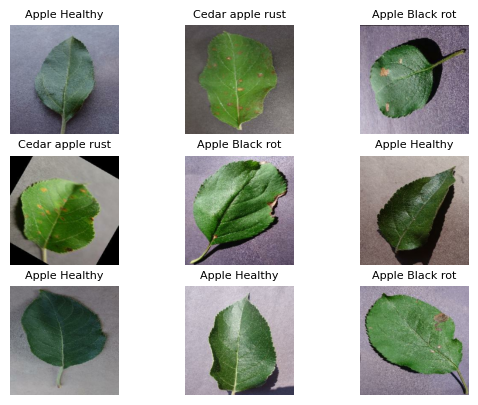

In [ ]:
classes=train_dataset.class_names
for image_batch,label_batch in train_dataset.take(1):
  print(f"Image batch shape: {image_batch.shape}")
  print(f"Class names: {[classes[label] for label in label_batch ]}")
  for n in  range(9):
    ax=plt.subplot(3,3,n+1)
    plt.imshow(image_batch[n].numpy().astype('uint8'))
    plt.title(classes[label_batch[n]],fontsize=8)
    plt.axis('off')

In [ ]:
train_dataset=train_dataset.take(int(len(train_dataset)*0.6))
def data_partition_for_model(dataset,train_split=0.8,test_split=0.1,valid_split=0.1,shuffle=True,shuffle_size=10000):
  if shuffle:
    dataset.shuffle(shuffle_size,seed=23)

  data_size=len(dataset)
  train_size=int(data_size*train_split)
  valid_size=int(data_size*valid_split)

  train_data=dataset.take(train_size)
  valid_data=dataset.skip(train_size).take(valid_size)
  test_data=dataset.skip(train_size).skip(valid_size)
  return train_data,valid_data,test_data

In [ ]:
train_ds,valid_ds,test_ds=data_partition_for_model(train_dataset)
len(train_ds),len(valid_ds),len(test_ds)

(196, 24, 26)

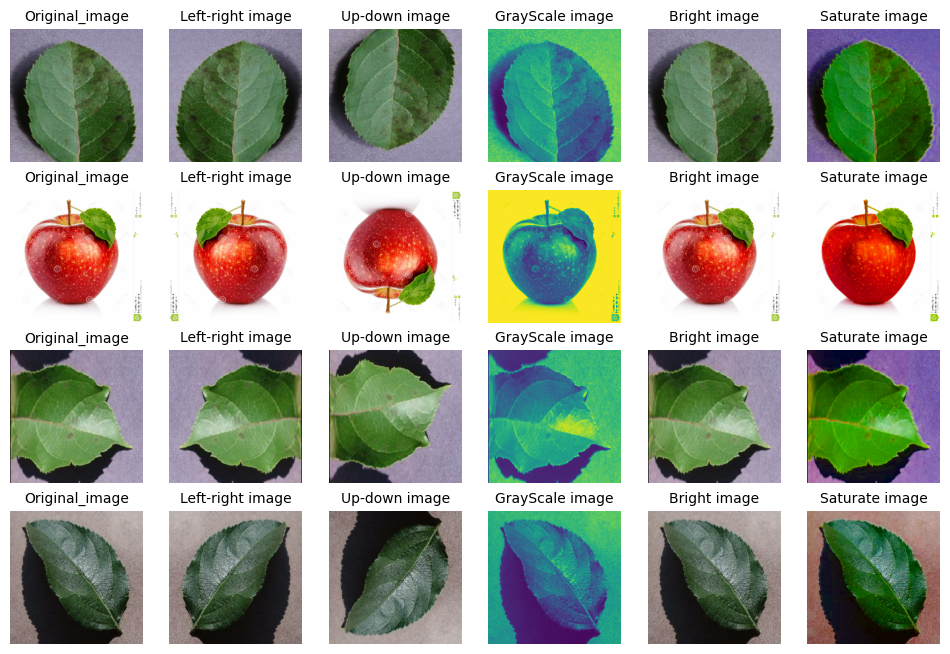

In [ ]:
for image_batch, label_batch  in train_ds.take(1):
  i=0
  plt.figure(figsize=(12,8))
  j,k=0,6
  for n in range(4):
    title_names=['Original_image','Left-right image','Up-down image',
                 'GrayScale image','Bright image','Saturate image']
    image_augmented_types=[]
    image_augmented_types.append(image_batch[n])
    image_augmented_types.append(image.flip_left_right(image_batch[n]))
    image_augmented_types.append(image.flip_up_down(image_batch[n]))
    image_augmented_types.append(image.rgb_to_grayscale(image_batch[n]))
    image_augmented_types.append(image.adjust_brightness(image_batch[n],0.5))
    image_augmented_types.append(image.adjust_saturation(image_batch[n],3))
    for i,l in enumerate(range(j,k)):
      ax=plt.subplot(4,6,l+1)
      plt.imshow(image_augmented_types[i].numpy().astype('uint8'))
      plt.title(title_names[i],fontsize=10)
      plt.axis('off')
    j+=6
    k+=6

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_ds=valid_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
INPUT_SHAPE=(BATCH_SIZE,)+IMAGE_SIZE+(3,)
class CNNBlock(layers.Layer):
  def __init__(self,out_channels,kernel_size=3):

    super(CNNBlock,self).__init__()
    self.conv2D=layers.Conv2D(out_channels,kernel_size=kernel_size,padding='same')
    self.batchnorm=layers.BatchNormalization()
    self.maxpooling2D=layers.MaxPool2D(pool_size=(2,2),padding='valid')

  def call(self,input_array,training=False):

    x=self.conv2D(input_array,training=training)
    x=self.batchnorm(x)
    x=tf.nn.relu(x)
    x=self.maxpooling2D(x)
    return x


class ResBlock(keras.Model):
  def __init__(self,channels,num_classes):

    super(ResBlock,self).__init__()
    self.resize_rescale=resize_rescale=tf.keras.Sequential([
        layers.experimental.preprocessing.Resizing(224,224),
        layers.experimental.preprocessing.Rescaling(1.0/255)
        ])
    self.data_data_augmentation=data_augmentation=tf.keras.Sequential([
        layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
        layers.experimental.preprocessing.RandomRotation(0.2)
        ])

    self.cnn1=CNNBlock(channels[0])
    self.cnn2=CNNBlock(channels[1])
    self.cnn3=CNNBlock(channels[2])
    self.flatten=layers.Flatten()
    self.dense1=layers.Dense(128,activation='relu')
    self.dense2=layers.Dense(num_classes,activation='sigmoid')

  def call(self,input_array,training=False):

    x=self.resize_rescale(input_array)
    x=self.data_data_augmentation(x)
    x=self.cnn1(x,training=training)
    x=self.cnn2(x,training=training)
    x=self.cnn3(x,training=training)
    x=self.flatten(x)
    x=self.dense1(x)

    return self.dense2(x)

model=ResBlock(channels=[32,64,64],num_classes=1)

model.build(input_shape=INPUT_SHAPE)

In [ ]:
model.summary()

Model: "res_block_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (32, 224, 224, 3)         0         
                                                                 
 sequential_6 (Sequential)   (32, 224, 224, 3)         0         
                                                                 
 cnn_block_3 (CNNBlock)      multiple                  1024      
                                                                 
 cnn_block_4 (CNNBlock)      multiple                  18752     
                                                                 
 cnn_block_5 (CNNBlock)      multiple                  37184     
                                                                 
 flatten_2 (Flatten)         multiple                  0         
                                                                 
 dense_4 (Dense)             multiple                  

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=3e-5),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
model.fit(x=train_ds,validation_data=valid_ds,batch_size=BATCH_SIZE,epochs=2,verbose=1)

Epoch 1/2


KeyboardInterrupt: 

In [ ]:
model.evaluate(test_ds,batch_size=BATCH_SIZE,verbose=1)

21/21 [==============================] - 7s 33ms/step - loss: 5.5885e-05 - accuracy: 1.0000


[5.588459316641092e-05, 1.0]

In [ ]:
#model=ResBlock(channels=[32,64,64],num_classes=1)
model.load_weights('/content/model_for_bell_pepper.h5')
model.evaluate(test_ds,batch_size=BATCH_SIZE,verbose=1)

24/24 [==============================] - 1s 28ms/step - loss: 0.0633 - accuracy: 0.9812


[0.0633072778582573, 0.9811574816703796]

In [ ]:
def get_prediction(model,img):
    img_arr=tf.keras.preprocessing.image.img_to_array(img.numpy())
    img_arr=tf.expand_dims(img_arr,0)
    predicted=model.predict(img_arr)
    result=classes[np.argmax(predicted[0])]
    accuracy=np.round(100*np.max(predicted[0]),2)
    return result,accuracy

for image_batch,label_batch in test_ds.take(1):
    plt.figure(figsize=(16,17))
    for i in range(16):
        ax=plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        predict,accuracy=get_prediction(model,image_batch[i])
        title=f"Actual: {classes[label_batch[i]]}.\n Predicted: {predict}.\n Accuracy: {accuracy}%"
        plt.title(title)
        plt.axis('off')

KeyboardInterrupt: 

In [ ]:
resize_rescale=tf.keras.Sequential([
        layers.experimental.preprocessing.Resizing(224,224),
        layers.experimental.preprocessing.Rescaling(1.0/255)
])
data_augmentation=tf.keras.Sequential([
        layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
        layers.experimental.preprocessing.RandomRotation(0.2)
])

INPUT_SHAPE=(BATCH_SIZE,)+IMAGE_SIZE+(3,)
model=keras.models.Sequential()
model.add(resize_rescale)
model.add(data_augmentation)
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(INPUT_SHAPE),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))
model.build(input_shape=INPUT_SHAPE)

In [ ]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])

history=model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=10,
    batch_size=BATCH_SIZE,
    verbose=1)

Epoch 1/10
196/196 [==============================] - 36s 90ms/step - loss: 0.8247 - accuracy: 0.6494 - val_loss: 0.7834 - val_accuracy: 0.6862
Epoch 2/10
196/196 [==============================] - 9s 48ms/step - loss: 0.4738 - accuracy: 0.8214 - val_loss: 0.3974 - val_accuracy: 0.8620
Epoch 3/10
196/196 [==============================] - 9s 45ms/step - loss: 0.3286 - accuracy: 0.8777 - val_loss: 0.4490 - val_accuracy: 0.8281
Epoch 4/10
196/196 [==============================] - 9s 45ms/step - loss: 0.2399 - accuracy: 0.9133 - val_loss: 0.2831 - val_accuracy: 0.9062
Epoch 5/10
196/196 [==============================] - 9s 46ms/step - loss: 0.1521 - accuracy: 0.9450 - val_loss: 0.1892 - val_accuracy: 0.9375
Epoch 6/10
196/196 [==============================] - 9s 47ms/step - loss: 0.1433 - accuracy: 0.9498 - val_loss: 0.1950 - val_accuracy: 0.9375
Epoch 7/10
196/196 [==============================] - 9s 45ms/step - loss: 0.1235 - accuracy: 0.9571 - val_loss: 0.2207 - val_accuracy: 0.937

In [ ]:
def get_prediction(model,img):
    img_arr=tf.keras.preprocessing.image.img_to_array(img.numpy())
    img_arr=tf.expand_dims(img_arr,0)
    predicted=model.predict(img_arr)
    result=classes[np.argmax(predicted[0])]
    accuracy=np.round(100*np.max(predicted[0]),2)
    return result,accuracy

for image_batch,label_batch in test_ds.take(1):
    plt.figure(figsize=(16,17))
    for i in range(16):
        ax=plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        predict,accuracy=get_prediction(model,image_batch[i])
        title=f"Actual: {classes[label_batch[i]]}.\n Predicted: {predict}.\n Accuracy: {accuracy}%"
        plt.title(title)
        plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!zip /content/model_for_cherry.zip /content/model_for_cherry

	zip warning: name not matched: /content/model_for_cherry

zip error: Nothing to do! (/content/model_for_cherry.zip)


In [ ]:
model.save('strawberry.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
